In [1]:
import gensim
import io

In [20]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    k = 0
    for line in fin:
        k += 1
        print(k, end=' ')
        if k > 20:
            break
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [21]:
fname = 'wiki.en.vec'

In [22]:
vec = load_vectors(fname)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

In [23]:
vec

{',': <map at 0x7f76058c6eb0>,
 '.': <map at 0x7f7507103ac0>,
 'the': <map at 0x7f75b8bdadf0>,
 '</s>': <map at 0x7f7507103970>,
 'of': <map at 0x7f7507103d00>,
 '-': <map at 0x7f75071038b0>,
 'in': <map at 0x7f7507103820>,
 'and': <map at 0x7f7507103160>,
 "'": <map at 0x7f75070fae80>,
 ')': <map at 0x7f7507103c70>,
 '(': <map at 0x7f7507103d90>,
 'to': <map at 0x7f7507103910>,
 'a': <map at 0x7f75071037c0>,
 'is': <map at 0x7f7507103940>,
 'was': <map at 0x7f7507103790>,
 'on': <map at 0x7f75071039a0>,
 's': <map at 0x7f75071033a0>,
 'for': <map at 0x7f75071037f0>,
 'as': <map at 0x7f75071038e0>,
 'by': <map at 0x7f7507103880>}

In [14]:
vec['for']

[-0.043457,
 0.11336,
 -0.090211,
 0.10783,
 -0.12458,
 0.010564,
 -0.053752,
 0.040688,
 -0.071978,
 0.12988,
 0.18367,
 -0.19067,
 0.23183,
 0.2526,
 0.1769,
 -0.067999,
 -0.032019,
 -0.091964,
 0.135,
 0.14054,
 0.11034,
 0.21687,
 -0.072976,
 -0.15426,
 -0.03326,
 0.026052,
 0.16755,
 0.030611,
 -0.11283,
 0.088465,
 -0.29436,
 -0.017995,
 -0.18437,
 0.086588,
 0.20259,
 -0.092321,
 0.046651,
 -0.10229,
 0.071462,
 0.069793,
 -0.13052,
 -0.014411,
 -0.056368,
 0.15818,
 -0.020047,
 -0.10617,
 0.23458,
 0.0035062,
 -0.14388,
 -0.018622,
 -0.069637,
 -0.2153,
 -0.11409,
 -0.10171,
 0.029783,
 -0.04675,
 0.20507,
 0.0067837,
 -0.13647,
 0.0070587,
 0.04308,
 -0.097742,
 0.33185,
 -0.24975,
 0.11143,
 0.027497,
 -0.020893,
 -0.15535,
 -0.20601,
 -0.0264,
 -0.11679,
 -0.041209,
 0.052129,
 -0.14148,
 -0.24781,
 -0.046432,
 0.30543,
 0.049252,
 0.17925,
 -0.048079,
 0.080292,
 0.27301,
 -0.14418,
 0.021085,
 0.013487,
 -0.24578,
 -0.25759,
 0.026981,
 -0.22953,
 -0.151,
 -0.12973,
 -0.04

In [3]:
import gensim.downloader as api

In [17]:
model = api.load('conceptnet-numberbatch-17-06-300')

[==================================================] 100.0% 1168.7/1168.7MB downloaded


In [48]:
model2 = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
model = api.load('word2vec-google-news-300')

In [5]:
model.most_similar('twitter')

[('Twitter', 0.89089035987854),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431625723838806),
 ('tweeting', 0.7161933183670044),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [6]:
import time

In [12]:
t = time.time()
for i in range(10):
    res = model.most_similar('smile')
print(res)
print(time.time() - t)

[('grin', 0.860400915145874), ('smiles', 0.7890904545783997), ('grins', 0.7553828358650208), ('beaming_smile', 0.7371095418930054), ('smirk', 0.7140929102897644), ('smiling', 0.7107788920402527), ('mischievous_smile', 0.7057194709777832), ('toothy_grin', 0.6806033253669739), ('toothy_smile', 0.6587662696838379), ('sly_grin', 0.6584253907203674)]
2.3532748222351074


# Word2vec trained models

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
model = 1

In [3]:
model = Word2Vec.load("merged_model")

In [4]:
import random
import math
random.seed(1)
files = [
('Американский сленг.txt', 1, 2),
('Английские идиомы с переводом и примерами.txt', 1, 3),
('Английские пословицы и поговорки.txt', 1, 2),
('Английские разговорные словосочетания и выражения.txt', 1, 2),
('Английский сленг.txt', 1, 2),
('Глаголы для описания приготовления пищи.txt', 1, 2),
('Лексика по теме Автомобиль.txt', 1, 3),
('Лексика по теме Анатомия.txt', 1, 3),
('Лексика по теме Археология.txt', 2, 3),
('Лексика по теме Архитектура.txt', 2, 3),
('Лексика по теме Аэропорт.txt', 1, 3),
('Лексика по теме Внешность.txt', 1, 3),
('Лексика по теме Выборы.txt', 1, 3),
('Лексика по теме Город.txt', 2, 3),
('Лексика по теме Гостиница.txt', 1, 2),
('Лексика по теме Грамматика.txt', 2, 2),
('Лексика по теме Деревья.txt', 2, 2),
('Лексика по теме Дом.txt', 1, 3),
('Лексика по теме Еда.txt', 2, 2),
('Лексика по теме Животные.txt', 1, 3),
('Лексика по теме Здоровье, части тела.txt', 2, 3),
('Лексика по теме Имущество.txt', 1, 2),
('Лексика по теме Искусство.txt', 1, 2),
('Лексика по теме Карты (игральные).txt', 1, 3),
('Лексика по теме Карьера.txt', 1, 2),
('Лексика по теме Кино.txt', 1, 2),
('Лексика по теме Компьютер.txt', 1, 2),
('Лексика по теме Кустарники.txt', 2, 2),
('Лексика по теме Магазины.txt', 2, 2),
('Лексика по теме Мебель.txt', 2, 2),
('Лексика по теме Медицина.txt', 1, 2),
('Лексика по теме Мобильный телефон.txt', 1, 2), ##
('Лексика по теме Музыка.txt', 1, 3),
('Лексика по теме Насекомые.txt', 2, 2),
('Лексика по теме Одежда.txt', 1, 3),
('Лексика по теме Олимпийские виды спорта.txt', 1, 3),
('Лексика по теме Профессии.txt', 1, 2),
('Лексика по теме Птицы.txt', 2, 3),
('Лексика по теме Путешествие.txt', 2, 2),
('Лексика по теме Рыбы.txt', 1, 2),
('Лексика по теме Семья и родственники.txt', 2, 3),
('Лексика по теме Спорт.txt', 1, 2),
('Лексика по теме Строительство.txt', 2, 2),
('Лексика по теме Футбол.txt', 2, 2),
('Лексика по теме Характер.txt', 2, 3),
('Лексика по теме Химия.txt', 2, 3),
('Лексика по теме Хобби.txt', 1, 2),
('Лексика по теме Хоккей.txt', 2, 2),
('Лексика по теме Художественные промыслы.txt', 2, 2),
('Лексика по теме Цвета.txt', 1, 3),
('Лексика по теме Шахматы.txt', 1, 3),
('Лексика по теме Экология.txt', 1, 2),
('Лексика по теме Экономика.txt', 2, 3)
]

In [5]:
class User:
    # интерес - список интересов те числ от 0 до 1, часть слов, которые знает юзер
    def __init__(self, intresting, intr_param=0.5):
        self.words_known = set()
        self.words_intresting = set()
        for i, intr in enumerate(intresting):
            with open(f'clear_dict/{files[i][0]}') as f:
                data = f.read().split('\n')
                # все данные из файла с интересной темой кладем в words_intresting
                if intr >= intr_param:
                    for word in data:
                        self.words_intresting.add(word)
                # для каждой темы кладем пропорционально интересу слов в words_known
                for word in random.choices(data, k=math.floor(intr * len(data))):
                    self.words_known.add(word)
    def is_intersting(self, word):
        return word in self.words_intresting
    def is_known(self, word):
        return word in self.words_known

In [6]:
u = User([1] * len(files))
u1 = User([random.uniform(0,1) for i in files], intr_param=0.5)
u2 = User([random.uniform(0,1) for i in files], intr_param=0.5)

In [7]:
def predict_by_word(word, max=100):
    if word in model.wv:
        vec = model.wv[word]
        return predict_by_vec(vec, max=max)
def predict_by_vec(vec, max=100):
    return [w for w in getSameWord(vec, max=max) if not is_known(w) and is_interesting(w)]
def is_known(word):
    return False
def is_interesting(word):
    return True
def getSameWord(vec, max=10, similarity=0.5):
    res = model.similar_by_vector(vec, topn=max)
    for w in res:
        word = w[0].lower()
        if w[1] < similarity:
            continue
        if is_word_correct(word):
            yield word.replace('_', ' ')
import re
punct = re.compile(f'[^a-z\'_-]')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = set(map(lambda x: x.lower(), stop))
def is_word_correct(word):
    return word not in stop and punct.search(word) is None

In [8]:
known = [] # мы знаем о том, что юзер знает эти слова
total = u1.words_known # ограничиваем список всех слов (для теста)
already_known = [] # слова, которые мы порекомендовали, но юзер их уже знал
interests = [] # слова, которые мы порекомендовали и юзеру они оказались интересны (включая уже известные)
total_pred = [] # все предсказанные слова
k=200
for w in random.choices(list(u1.words_known), k=k):
    known.append(w)

for i, w in enumerate(known):
    print(str((i+1)/k) + '\t', end='\r')
    pred = predict_by_word(w, max=1000)
    if pred is None:
        pred = []
    for pw in pred:
        if pw in total:
            total_pred.append(pw)
            if u1.is_intersting(pw):
                interests.append(pw)
            if u1.is_known(pw):
                already_known.append(pw)

<ipython-input-7-6918d529b4b9>:12: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  res = model.similar_by_vector(vec, topn=max)


In [9]:
test = []
k=500
for w in random.choices(list(total), k=k):
    test.append((w, u2.is_known(w)))


In [10]:
import pandas as pd
train = {'vec': [], 'ans': []}
for (w, kn) in test:
    if w in model.wv:
        train['vec'].append(model.wv[w])
        train['ans'].append(int(kn))
x_t = pd.DataFrame(train['vec'])
x_t = pd.DataFrame(train['vec'])

In [11]:
comp=5
sklearn_pca = sklearnPCA(n_components=comp)
pca_tfidf_sklearn = sklearn_pca.fit(x_t)

In [12]:
data = []
for w in list(total):
    data.append((w, u2.is_known(w)))
test_data = {'vec': [], 'ans': []}
for (w, kn) in data:
    if w in model.wv and (w, kn) not in test:
        test_data['vec'].append(model.wv[w])
        test_data['ans'].append(int(kn))
x = pd.DataFrame(test_data['vec'])
y = pd.DataFrame(test_data['ans'])

In [13]:
x1 = pca_tfidf_sklearn.transform(x)

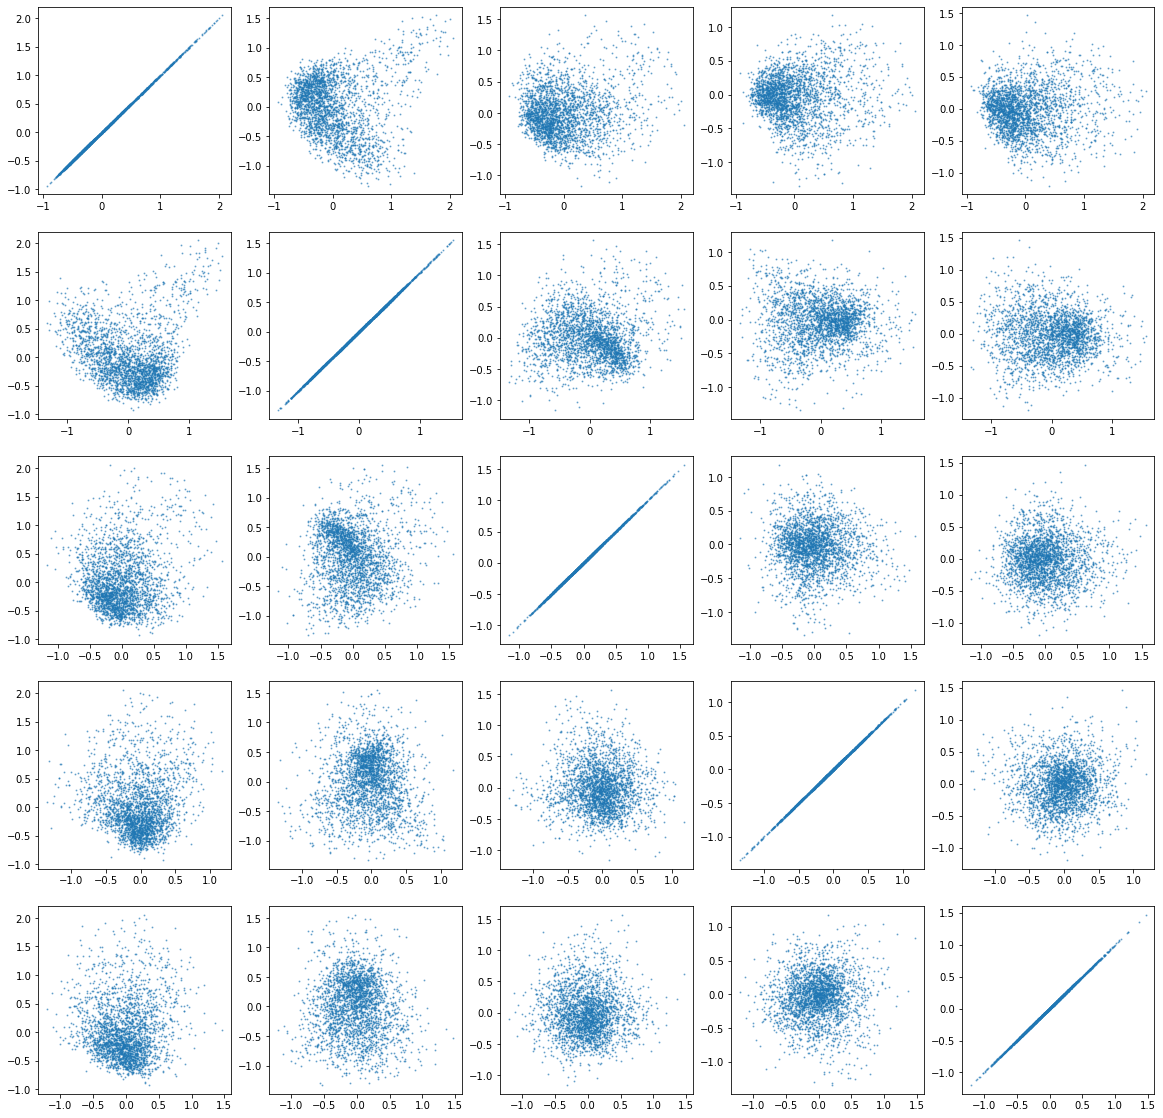

In [14]:
fig, axs = plt.subplots(comp, comp)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in range(comp):
    for j in range(comp):
        axs[i, j].scatter(x1[:, i], x1[:, j], alpha=0.5, s=1)